# Классификация фруктов с помощью сверточных сетей

## Описание

Построить и обучить сверточную нейронную сеть на наборе данных с фруктами. Значение accuracy на тестовой выборке должно быть не меньше 90%. Ограничение: модель должна обучиться за час.

Задача решается с использованием GPU-тренажера Yandex.Practicum.

## Импорт необходимых библиотек

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Функция загрузки обучающих данных

Чтобы увеличить выборку и повысить качество обучения модели, применим аугментацию, например отражения по вертикали и горизонтали, а также сдвиги. 

In [ ]:
def load_train(path):
    datagen = ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 width_shift_range=0.20,
                                 height_shift_range=0.20)
    datagen_flow = datagen.flow_from_directory(
        path,
        target_size=(150, 150), 
        batch_size=16,
        class_mode='sparse',
        subset='training',
        seed=12345)
    return datagen_flow

## Функция создания модели

Модель содержит две пары чередующихся слоев Conv2D и AvgPool2D, промежуточный слой Flatten и три полносвязных слоя с постепенным уменьшением их размеров. Для оптимизации обучения использовался алгоритм Adam с коэффициентом 0.001.

In [ ]:
def create_model(input_shape):
    model = Sequential()
    optimizer = Adam(lr=0.001) 
    model.add(Conv2D(filters=6, kernel_size=(5, 5), input_shape=(150, 150, 3), padding='same', activation='relu'))
    model.add(AvgPool2D(pool_size=(2, 2), strides=None, padding='valid'))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(AvgPool2D(pool_size=(2, 2), strides=None, padding='valid'))
    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=12, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

## Обучение модели

Заданной точности модели удалось достигнуть при увеличении количества эпох до 20.

In [ ]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
               steps_per_epoch=None, validation_steps=None):

    model.fit(train_data,
              validation_data=test_data,
              epochs=epochs,
              batch_size=batch_size, 
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

## Результат обучения модели

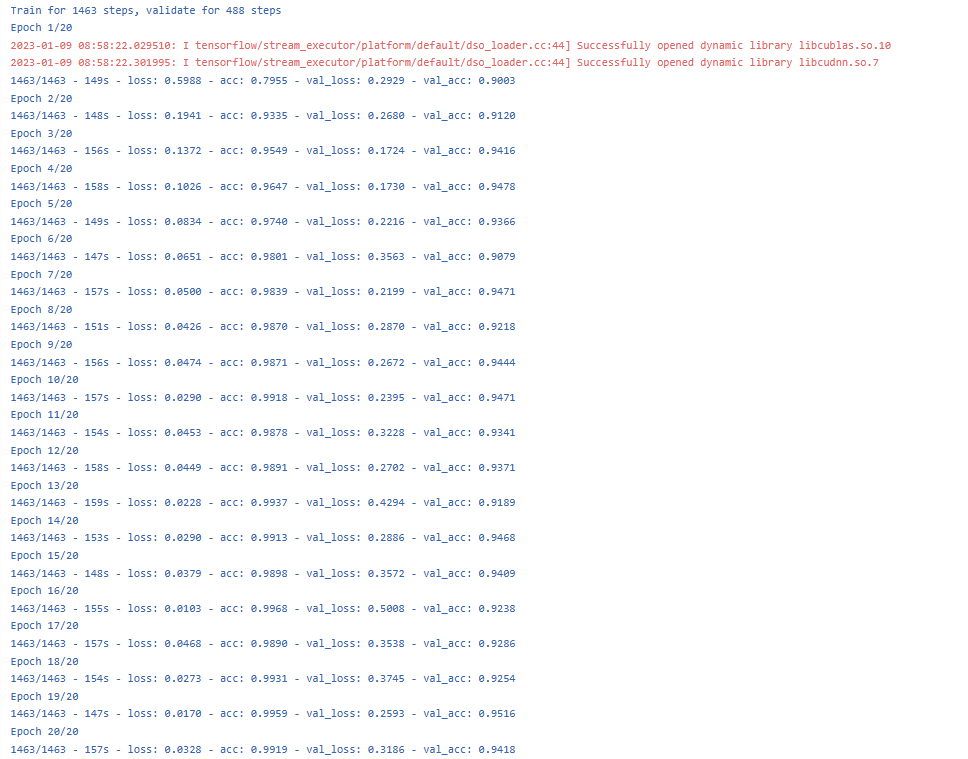

## Анализ результатов

Построенная модель позволяет классифицировать фрукты с точностью 94%, что соответсвует условию задачи.